# Autómatas y Lenguajes Formales

#### Profesor: Gustavo Garzón

In [0]:
from google.colab import drive
drive.mount('/content/drive')
!cd /content/drive/'My Drive'/automatas/notebooks && pwd

In [0]:
!pip install automata-lib==1.0.0.post4

## Máquinas de Turing (*TM* )

La librería [automata](https://pypi.python.org/pypi/automata-lib/1.0.0.post3) de **python 3** permite trabajar con Máquinas de Turing

In [0]:
from automatalib.tm.dtm import DTM

## Máquinas de turing para el cálculo de funciones de enteros

### Ejercicio suma unaria
Desarollar una máquina de turing que cálcule la función suma $s(n,m)=n+m$ con $n.m\geq1$, en el sistema unario.  
La función recibe entradas $1^{n}01^{m}$ y se debe generar la sálida $1^{n+m}$.

In [0]:
from IPython.display import Image
Image(filename='files/tmf1.png',width=700)

<div style="text-align:center; font-style: italic;" class="image">
<div>Figura 4. Diagrama de estados de TM para cálculo de la suma unaria</div>
</div>
<br>

In [0]:
dtm4 = DTM(
    states={'q0', 'q1', 'q2', 'q3', 'qf'},
    input_symbols={'1', '0'},
    tape_symbols={'1', '0','.'}, #El punto se usa para limpiar el símbolo de la cinta es indicado por la letra b
    transitions={
        'q0': {
            '1': ('q0', '1', 'R'),
            '0': ('q1', '1', 'R')
        },
        'q1': {
            '1': ('q1', '1', 'R'),
            '.': ('q2', '.', 'L')
        },
        'q2': {
            '1': ('q3', '.', 'L')
        },
        'q3': {
            '1': ('q3', '1', 'L'),
            '.': ('qf', '.', 'R')
        }
    },
    initial_state='q0',
    blank_symbol='.',
    final_states={'qf'}
)

In [0]:
dtm4.validate_input('1110111')

In [0]:
[(state, tape.copy()) for state, tape in dtm4.validate_input('1110111', step=True)]

<div style="height:100px;"></div>

### Ejercicio resta propia

Desarrollar una máquina de turing que cálcule la función resta propia dada de la siguiente manera:
- Cada entero se representa por un único caracter  
- $m-n=max(m-n,0)$ es $m-n$ si $m \geq n$ cero en otro caso.
- La cinta inicia con un conjunto de valores $0^{m}10^{n}$  
- La máquina para cuando el contenido de la cinta es $0^{max(m-n,0)}$

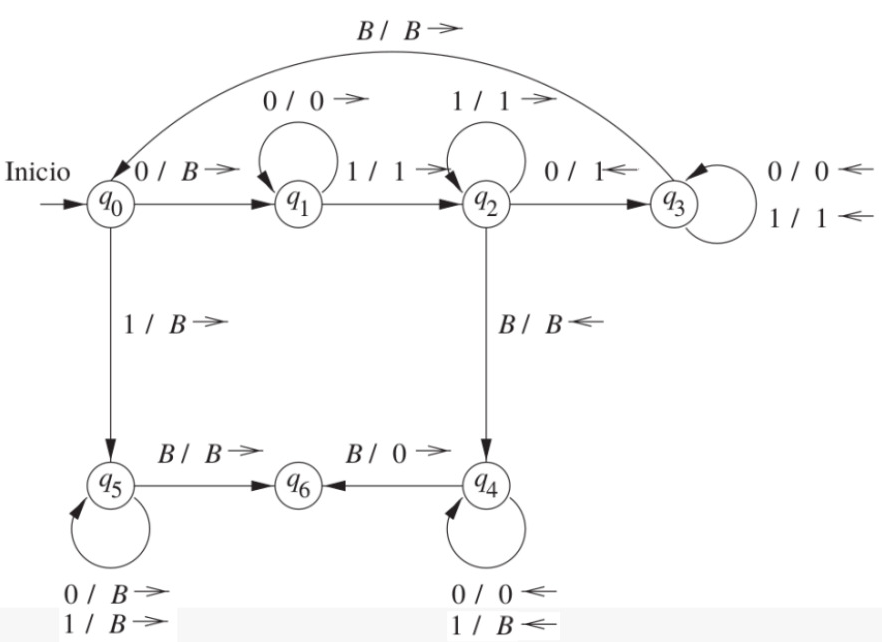

In [0]:
from IPython.display import Image
Image(filename='files/tmf2.png',width=700)

<div style="text-align:center; font-style: italic;" class="image">
<div>Figura 5. Diagrama de estados de TM para cálculo de la resta propia</div>
</div>
<br>

In [0]:
from automata.tm.dtm import DTM
dtm5 = DTM(
    states={'q0', 'q1', 'q2', 'q3', 'q4','q5','q6'},
    input_symbols={'0', '1'},
    tape_symbols={'0', '1','.'}, #El punto se usa para limpiar el símbolo de la cinta
    transitions={
        'q0': {
            '1': ('q5', '.', 'R'),
            '0': ('q1', '.', 'R')
        },
        'q1': {
            '0': ('q1', '0', 'R'),
            '1': ('q2', '1', 'R')
        },
        'q2': {
            '1': ('q2', '1', 'R'),
            '0': ('q3', '1', 'L'),
            '.': ('q4', '.', 'L')
        },
        'q3': {
            '0': ('q3', '0', 'L'),
            '1': ('q3', '1', 'L'),
            '.': ('q0', '.', 'R')
        },
        'q4': {
            '0': ('q4', '0', 'L'),
            '.': ('q6', '0', 'R'),
            '1': ('q4', '.', 'L')
            
        },
        'q5': {
            '0': ('q5', '.', 'R'),
            '.': ('q6', '.', 'R'),
            '1': ('q5', '.', 'R')
            
        }
    },
    initial_state='q0',
    blank_symbol='.',
    final_states={'q6'}
)

In [0]:
dtm5.validate_input('0001000')

In [0]:
[(state, tape.copy()) for state, tape in dtm5.validate_input('001', step=True)]

<div style="height:100px;"></div>

<!--### Maquina de Turing de Multiples Pistas y almacenamiento de estado-->

<!--### MT con Almacenamiento de estado-->
<!--En el siguiente ejercicio se implementa una MT que reconoce el lenguaje $L= \{ 01^{*}+ 10^{*}\}$. 
Para ella aprovechamos la capacidad de almacenar un dato en la unidad de control y luego recorrer la cinta.-->

In [0]:
#from automata.tm.dtm import DTM
#dtm6 = DTM(
#    states={'[q0,B]', '[q1,0]', '[q1,1]', '[q1,B]'},
#    input_symbols={'1', '0'},
#    tape_symbols={'1', '0','B'}, #El punto se usa para limpiar el símbolo de la cinta es indicado por la letra b
#    transitions={
#        '[q0,B]': {
#            '1': ('[q1,1]', '1', 'R'),
#            '0': ('[q1,0]', '0', 'R')
#        },
#        '[q1,0]': {
#            '1': ('[q1,0]', '1', 'R'),
#            'B': ('[q1,B]', 'B', 'R')
#        },
#        '[q1,1]': {
#            '0': ('[q1,1]', '0', 'R'),
#            'B': ('[q1,B]', 'B', 'R')
#        }
#    },
#    initial_state='[q0,B]',
#    blank_symbol='B',
#    final_states={'[q1,B]'}
#)

In [0]:
#dtm6.validate_input('011111111111111')

In [0]:
#[(state, tape.copy()) for state, tape in dtm6.validate_input('011111111111111', step=True)]

In [0]:
#dtm6.validate_input('10000000000000')

In [0]:
#[(state, tape.copy()) for state, tape in dtm6.validate_input('10000000000000', step=True)]

<div style="height:100px;"></div>

<!--### MT con Almacenamiento de estado-->
<!-- Desarrolle una MT con dos pistas y almacene hasta un simbolo en la unidad de control para que copie una palabra $w_1w_2w_3c$ una vez. -->

## Máquinas de Turing para el residuo de una división

Diseño de una <b>MT simple</b> que calcula el residuo de la división de n por 4, para cualquier número natural $n \geq 1$ escrito en el sistema de numeración unario (n se escribe como una secuencia de unos).

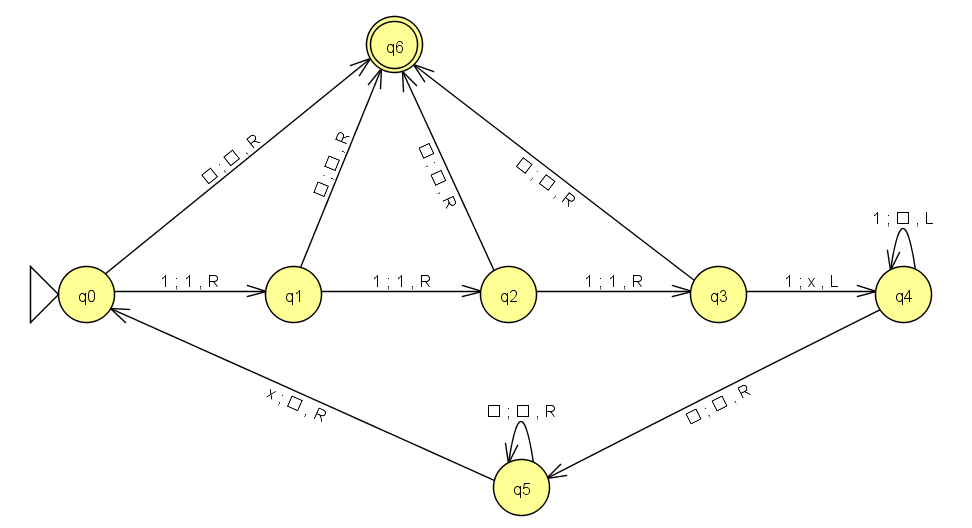

In [0]:
from IPython.display import Image
Image(filename='files/Punto3MTImg.png',width=800)

In [0]:
from automata.tm.dtm import DTM
d = DTM(
        states={'q0', 'q1', 'q2','q3', 'q4', 'q5', 'q6'},
        input_symbols={'1'},
        tape_symbols={'x', '1', 'B'}, 
        transitions={
            'q0': {
                'B': ('q6', 'B', 'R'),
                '1': ('q1', '1', 'R')
            },
            'q1': {
                'B': ('q6', 'B', 'R'),
                '1': ('q2', '1', 'R')
            },
            'q2': {
                'B': ('q6', 'B', 'R'),
                '1': ('q3', '1', 'R')
            },
            'q3': {
                'B': ('q6', 'B', 'R'),
                '1': ('q4', 'x', 'L')
            },
            'q4': {
                'B': ('q5', 'B', 'R'),
                '1': ('q4', 'B', 'L')
            },
            'q5': {
                'B': ('q5', 'B', 'R'),
                'x': ('q0', 'B', 'R')
            }
        },
        initial_state='q0',
        blank_symbol='B',
        final_states={'q6'}

)

In [0]:
d.validate_input('1111')

In [0]:
[(state, tape.copy()) for state, tape in d.validate_input('1111', step=True)]

<div style="height:100px;"></div>

## Máquinas de Turing para otros lenguajes

Diseño de una MT simple para reconocer el lenguaje: $\mathcal{L} = \{ a^{i}b^{j}c^{i*j} \mid i,j > 0 \}$

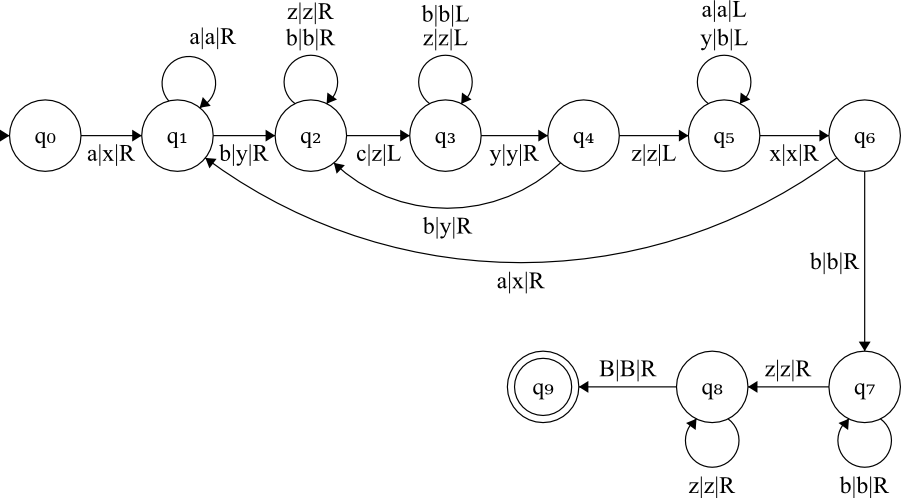

In [0]:
from IPython.display import Image
Image(filename='files/tmmultip02.png',width=800)

In [0]:
from automata.tm.dtm import DTM
d = DTM(
        states={'q0', 'q1', 'q2', 'q3', 'q4', 'q5','q6', 'q7', 'q8','q9'},
         input_symbols={'a', 'b', 'c'},
         tape_symbols={'x', 'y', 'z', 'B', 'a', 'b', 'c'},
         transitions={
            'q0': {
                'a': ('q1', 'x', 'R'),
            },
            'q1': {
                'a': ('q1', 'a', 'R'),
                'b': ('q2', 'y', 'R')
            },
            'q2': {
                'b': ('q2', 'b', 'R'),
                'z': ('q2', 'z', 'R'),
                'c': ('q3', 'z', 'L')
            },
            'q3': {
                'z': ('q3', 'z', 'L'),
                'b': ('q3', 'b', 'L'),
                'y': ('q4', 'y', 'R')
            },
            'q4': {
                'b': ('q2', 'y', 'R'),
                'z': ('q5', 'z', 'L')
            },
            'q5': {
                'y': ('q5', 'b', 'L'),
                'x': ('q6', 'x', 'R'),
                'a': ('q5', 'a', 'L')
            },
            'q6': {
                'a': ('q1', 'x', 'R'),
                'b': ('q7', 'b', 'R')
            },
            'q7': {
                'b': ('q7', 'b', 'R'),
                'z': ('q8', 'z', 'R')
            }, 
            'q8': {
                'z': ('q8', 'z', 'R'),
                'B': ('q9', 'B', 'R')
            }
         },
         initial_state='q0',
         blank_symbol='B',
         final_states={'q9'}

)

In [0]:
d.validate_input('aabbcccc')

In [0]:
[(state, tape.copy()) for state, tape in d.validate_input('aabbcccc', step=True)]

<div style="height:100px;"></div>

#### Limitaciones de automata-lib

A pesar de la amplia gama de simulaciones que soporta la libreria de ___automata-lib___ , existen limitaciones para representar maquinas de turing <b>multi-cinta</b>. Estas MT sin embargo las podemos modelar, implementar y simular utilizando JFLAP. 

A continuación se propone un ejercicio multicinta. 

#### Ejercicio multi-cinta propuesto. 

Diseñar una MT con dos cintas que acepte el lenguaje: $L=\{ a^{i}b^{i}c^{i}: i \geq 0 \}$

In [0]:
# Adjunte las imagenes de JFLAP del modelo propuesto y la simulación

## Referencias

[1] Implementación de una Máquina de Turing universal: https://rosettacode.org/wiki/Universal_Turing_machine

[2] Libreria en Python para máquinas de Turing: https://pypi.python.org/pypi/turing_machine

[2] Simulador de la Máquina de Turing https://turingmachinesimulator.com/ 

[2] Simulador de la máquina de Turing en C++ https://github.com/fcortes/turing-machine-simulator 

[2] Otras implementaciones https://github.com/topics/turing-machine 
